# 文本分类挖掘

机器学习中，分类问题是基础，很多应用都可以转化为分类问题，本实验重点试验文本分类。而针对中文文本数据，往往需要进行预处理和中文分词，中文分词不准确，将造成偏差过高。因此在对社交媒体文本数据训练模型之前需要数据预处理与中文分词。

本章实验分别进行文本数据预处理、中文分词和分类。

本章实验涉及KNN、SVM等分类算法，通过不同算法的效果对比来加深对算法的理解。

## 实验目的

    	掌握文本数据预处理的常用方法
    	掌握中文分词的常用工具
    	掌握KNN、SVM、决策树、高斯贝叶斯模型、伯努利贝叶斯模型等分类算法的原理与使用
    	掌握模型评估的方法


## 先读取相关的EXCEL文件

**pandas.read_excel(io,sheetname=0,header=0,names=None,index_col=None,usecols=None,squeeze= False,dtype=None,engine=None,converters=None,true_values=None,false_values=None,skiprows= None,nrow=None,na_values=None,keep_default_na=True,verbose=False,parse_dates=False, date_parser=None,thousands=None,comment=None,skipfooter=0,conver_float=True, mangle_dupe_cols=True)**

    io ：字符串，xls 或 xlsx 文件路径或类文件对象。
    sheet_name ：None、字符串、整数、字符串列表或整数列表，默认值为 0。字符串用于工作表名称；整数为索引，表示工作表位置，字符串列表或整数列表用于请求多个工作表，为 None 时则获取所有的工作表。参数值如表4 所示。
    header ：指定作为列名的行，默认值为 0，即取第一行的值为列名。数据为除列名以外的数据；若数据不包含列名，则设置为 header=None。
    names ：默认值为 None，要使用的列名列表。
    index_col ：指定列为索引列，默认值为 None，索引 0 是 DataFrame 对象的行标签。
    usecols ：int、list 或字符串，默认值为 None。
    如果为 None，则解析所有列。
    如果为 int，则解析最后一列。
    如果为 list 列表，则解析列号和列表的列。
    如果为字符串，则表示以逗号分隔的 Excel 列字母和列范围列表（例如，“A ：E”或    “A，C，E ：F”），范围包括双方。
    squeeze ：布尔值，默认值为 False，如果解析的数据只包含一列，则返回一个 Series。
    dtype ：列的数据类型名称或字典，默认值为 None。例如，{ 为 'a' ：np.float64，'b' ：np.int32}。
    kiprows ：省略指定行数的数据，从第一行开始。
    skipfooter ：省略指定行数的数据，从尾部数的行开始。

![](Pic/sheet.JPG)

说明：如果设置sheet_name = None, 则在生成表格的时候是返回的是dict字典类型，

因此如果想要重新处理成pandas.DataFrame类型需要修正方法，使用pandas.concat()方法对数据进行批量的连接

**pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
    keys=None, levels=None, names=None, verify_integrity=False)**

    objs: series，dataframe或者是panel构成的序列lsit
    axis： 需要合并链接的轴，0是行，1是列
    join：连接的方式 inner，或者outer
![](Pic/2t.png)

In [2]:
import pandas as pd
import collections
df_dict0 = pd.read_excel('新冠00.xlsx', sheet_name=None, index_col=None, na_values=['NA'])
df_dict0 = collections.OrderedDict(sorted(df_dict0.items()))
df = pd.concat(df_dict0.values(), ignore_index=True)


df_dict = pd.read_excel('新冠01.xlsx', sheet_name=None, index_col=None, na_values=['NA'])
df_dict = collections.OrderedDict(sorted(df_dict.items()))
dfx = pd.concat(df_dict.values(), ignore_index=True)

dfx = pd.concat([dfx, df], ignore_index=True)
dfx

,博主昵称,博主主页,微博认证,微博达人,微博内容,发布位置,发布时间,微博地址,微博来源,转发,评论,赞
0,austin_li,https://weibo.com/1850385232?refer_flag=100103...,NaN,NaN,湖人2位球员，03tohrg30，6人3位球员，掘金1位球员，凯尔特人斯玛特确诊新冠#NBA...,NaN,2020年03月30日 23:04,https://weibo.com/1850385232/IB3qrwd6t?refer_f...,0,NaN,NaN,NaN
1,魔女妈,https://weibo.com/2410092342?refer_flag=100103...,微博会员,NaN,纽约#新冠# //@战争史研究WHS:比起一下子被敲懵圈的中国，美国和欧洲至少有两个月的提前...,NaN,2020年03月30日 22:22,https://weibo.com/2410092342/IB39gA0wY?refer_f...,2,NaN,NaN,NaN
2,万宜商务咨询,https://weibo.com/5380538219?refer_flag=100103...,微博官方认证,NaN,#泰国疫情# 井喷在即，国王却失踪了？#新冠# 疫苗有重大突破！在#新加坡公众场所不保持一米...,NaN,2020年03月30日 20:49,https://weibo.com/5380538219/IB2xvDftU?refer_f...,0,NaN,NaN,NaN
3,春天文化,https://weibo.com/6083475503?refer_flag=100103...,NaN,NaN,#新冠# 下的#日本# ，东京都知事#小池百合子# 紧急记者见面会。打响面向#夜店# 等夜间...,NaN,2020年03月30日 20:40,https://weibo.com/6083475503/IB2tL7DNM?refer_f...,0,NaN,NaN,NaN
4,Fay南半球墨尔本日记,https://weibo.com/5409075755?refer_flag=100103...,NaN,NaN,3.26据统计，澳洲疫情导致两百万人失业，这是自1933年大萧条以来失业率最高的一刻，说澳洲...,NaN,2020年03月30日 20:07,https://weibo.com/5409075755/IB2gBAtCo?refer_f...,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6593,windham大叔,https://weibo.com/1684306562?refer_flag=100103...,NaN,NaN,CDC的说法是COVID19疫苗预计至少要等18个月以上#新冠#,NaN,2020年03月12日 08:27,https://weibo.com/1684306562/IydZqCKCX?refer_f...,0,NaN,NaN,NaN
6594,北美青茉,https://weibo.com/2477675414?refer_flag=100103...,微博会员,NaN,#美国疫情# 美国国家过敏和传染病研究所（N.I.A.I.D.）主任Anthony Fauc...,NaN,2020年03月12日 07:57,https://weibo.com/2477675414/IydN50FMH?refer_f...,0,NaN,NaN,NaN
6595,我是你苗姐Mia,https://weibo.com/5967006660?refer_flag=100103...,微博个人认证,NaN,"#华盛顿宣布进入紧急状态#最近的一两个星期#新冠#在美国爆发,疫情也影响到了我所在首都华盛顿...",NaN,2020年03月12日 07:25,https://weibo.com/5967006660/IydAo5vK9?refer_f...,1,NaN,NaN,NaN
6596,Cheney---Chen,https://weibo.com/2629408521?refer_flag=100103...,NaN,NaN,#新冠# 现在每天看全球人数，中国快好了，欧美严重了，啥时候能好啊？希望全球早点结束，人心惶惶,NaN,2020年03月12日 06:28,https://weibo.com/2629408521/Iydd4htDg?refer_f...,0,NaN,NaN,NaN


In [3]:
df_ym = pd.read_excel('new疫苗.xlsx', sheet_name=None, index_col=None, na_values=['NA'])
df_ym = collections.OrderedDict(sorted(df_ym.items()))
df_data = pd.concat(df_ym.values(), ignore_index=True)
df_data

,博主昵称,博主主页,微博认证,微博达人,微博内容,发布位置,发布时间,微博地址,微博来源,转发,评论,赞
0,用户6832664896,https://weibo.com/6832664896?refer_flag=100103...,NaN,NaN,新冠疫苗不是所有人 都可以打的你知道吗？#疫情 #新冠 #疫苗 ##快手# @快手 L火箭军...,NaN,01月01日 23:38,https://weibo.com/6832664896/JBdzbbPV3?refer_f...,0,NaN,NaN,NaN
1,泣泣再不见,https://weibo.com/1000480912?refer_flag=100103...,微博会员,NaN,-—10.1太原市一场大火带走13条生命，根源就是职能部门人浮于事漏检导致。表面上的火扑灭了...,NaN,01月01日 23:30,https://weibo.com/1000480912/JBdvUtgUP?refer_f...,0,NaN,NaN,NaN
2,泣泣再不见,https://weibo.com/1000480912?refer_flag=100103...,微博会员,NaN,-—10.1太原市一场大火带走13条生命，根源就是职能部门人浮于事漏检导致。表面上的火扑灭了...,NaN,01月01日 22:30,https://weibo.com/1000480912/JBd7ys6Y1?refer_f...,1,NaN,NaN,NaN
3,ZYYC88,https://weibo.com/5357308046?refer_flag=100103...,NaN,NaN,#疫情 #新冠 疫苗接种注意事项#疫苗 ##快手# @快手 L火箭军特色医学中心的快手视频,NaN,01月01日 21:30,https://weibo.com/5357308046/JBcJfddMJ?refer_f...,0,NaN,NaN,NaN
4,泣泣再不见,https://weibo.com/1000480912?refer_flag=100103...,微博会员,NaN,-—10.1太原市一场大火带走13条生命，根源就是职能部门人浮于事漏检导致。表面上的火扑灭了...,NaN,01月01日 21:30,https://weibo.com/1000480912/JBcJcviYD?refer_f...,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


本次实验A，个人使用了两个文本，拟分类为两部分：“新冠”模型和“疫苗“模型。 添加LB列表示标记，LB=0 表示新冠， LB=1表示疫苗。进行挖掘

实验B是小组合作的实验，实验根据之前爬取微博的结果，总体大致定义有4类。由于爬取的搜索关键词不同，得到的结果也不尽相同，现在打算对它们进行分类

第一类： 明星偶像类，以“肖战”和“王一博”为主要关键词作获取得到的结果，总共有

第二类： 新闻事件类，以“新冠”和“疫苗”为主要关键词获取得到的结果，结合当下的情境挖掘，总共有10376条的数据

第三类： 游戏类，以“原神”为关键词挖掘相关信息，总共有

第四类： 体育明星类，以“马龙”为关键词，总共有

### TEST FOR LAB A

下面我们尝试对相关内容进行标记添加，这里样例是针对LAB A,两个xlsx文件添加一列数据，
分类0或1并合并数据

添加

In [4]:
dfx['LabelA'] = 0
dfx.head()

,博主昵称,博主主页,微博认证,微博达人,微博内容,发布位置,发布时间,微博地址,微博来源,转发,评论,赞,LabelA
0,austin_li,https://weibo.com/1850385232?refer_flag=100103...,NaN,NaN,湖人2位球员，03tohrg30，6人3位球员，掘金1位球员，凯尔特人斯玛特确诊新冠#NBA...,NaN,2020年03月30日 23:04,https://weibo.com/1850385232/IB3qrwd6t?refer_f...,0,NaN,NaN,NaN,0
1,魔女妈,https://weibo.com/2410092342?refer_flag=100103...,微博会员,NaN,纽约#新冠# //@战争史研究WHS:比起一下子被敲懵圈的中国，美国和欧洲至少有两个月的提前...,NaN,2020年03月30日 22:22,https://weibo.com/2410092342/IB39gA0wY?refer_f...,2,NaN,NaN,NaN,0
2,万宜商务咨询,https://weibo.com/5380538219?refer_flag=100103...,微博官方认证,NaN,#泰国疫情# 井喷在即，国王却失踪了？#新冠# 疫苗有重大突破！在#新加坡公众场所不保持一米...,NaN,2020年03月30日 20:49,https://weibo.com/5380538219/IB2xvDftU?refer_f...,0,NaN,NaN,NaN,0
3,春天文化,https://weibo.com/6083475503?refer_flag=100103...,NaN,NaN,#新冠# 下的#日本# ，东京都知事#小池百合子# 紧急记者见面会。打响面向#夜店# 等夜间...,NaN,2020年03月30日 20:40,https://weibo.com/6083475503/IB2tL7DNM?refer_f...,0,NaN,NaN,NaN,0
4,Fay南半球墨尔本日记,https://weibo.com/5409075755?refer_flag=100103...,NaN,NaN,3.26据统计，澳洲疫情导致两百万人失业，这是自1933年大萧条以来失业率最高的一刻，说澳洲...,NaN,2020年03月30日 20:07,https://weibo.com/5409075755/IB2gBAtCo?refer_f...,0,NaN,NaN,NaN,0


同理，对第二个表格标记B，并合并两个表格

In [5]:
df_data['LabelA'] = 1
whole_xlsx = dfx = pd.concat([dfx, df_data], ignore_index=True)
whole_xlsx

,博主昵称,博主主页,微博认证,微博达人,微博内容,发布位置,发布时间,微博地址,微博来源,转发,评论,赞,LabelA
0,austin_li,https://weibo.com/1850385232?refer_flag=100103...,NaN,NaN,湖人2位球员，03tohrg30，6人3位球员，掘金1位球员，凯尔特人斯玛特确诊新冠#NBA...,NaN,2020年03月30日 23:04,https://weibo.com/1850385232/IB3qrwd6t?refer_f...,0,NaN,NaN,NaN,0
1,魔女妈,https://weibo.com/2410092342?refer_flag=100103...,微博会员,NaN,纽约#新冠# //@战争史研究WHS:比起一下子被敲懵圈的中国，美国和欧洲至少有两个月的提前...,NaN,2020年03月30日 22:22,https://weibo.com/2410092342/IB39gA0wY?refer_f...,2,NaN,NaN,NaN,0
2,万宜商务咨询,https://weibo.com/5380538219?refer_flag=100103...,微博官方认证,NaN,#泰国疫情# 井喷在即，国王却失踪了？#新冠# 疫苗有重大突破！在#新加坡公众场所不保持一米...,NaN,2020年03月30日 20:49,https://weibo.com/5380538219/IB2xvDftU?refer_f...,0,NaN,NaN,NaN,0
3,春天文化,https://weibo.com/6083475503?refer_flag=100103...,NaN,NaN,#新冠# 下的#日本# ，东京都知事#小池百合子# 紧急记者见面会。打响面向#夜店# 等夜间...,NaN,2020年03月30日 20:40,https://weibo.com/6083475503/IB2tL7DNM?refer_f...,0,NaN,NaN,NaN,0
4,Fay南半球墨尔本日记,https://weibo.com/5409075755?refer_flag=100103...,NaN,NaN,3.26据统计，澳洲疫情导致两百万人失业，这是自1933年大萧条以来失业率最高的一刻，说澳洲...,NaN,2020年03月30日 20:07,https://weibo.com/5409075755/IB2gBAtCo?refer_f...,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1
10372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1
10373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1
10374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1


可以看到对应的总数据量有1000多条，对着1w多条数据进行分类，分类之前需要预处理

### 文本数据预处理

首先我们进行数据清洗，对无意义的数据处理和数据去除

In [6]:
import numpy as np
import pandas as pd

# dropping columns that aren't needed
# 删除指定的学生成绩数据，关键代码如下：
# df.drop(['数学'],axis=1,inplace=True) #删除某列
#
# df.drop(columns='数学',inplace=True) #删除columns为“数学”的列
#
# df.drop(labels='数学', axis=1,inplace=True) #删除列标签为“数学”的列
whole_xlsx.drop(whole_xlsx.columns[[0,2,3,5,8,9,10,11]], axis=1, inplace=True)
whole_xlsx

,博主主页,微博内容,发布时间,微博地址,LabelA
0,https://weibo.com/1850385232?refer_flag=100103...,湖人2位球员，03tohrg30，6人3位球员，掘金1位球员，凯尔特人斯玛特确诊新冠#NBA...,2020年03月30日 23:04,https://weibo.com/1850385232/IB3qrwd6t?refer_f...,0
1,https://weibo.com/2410092342?refer_flag=100103...,纽约#新冠# //@战争史研究WHS:比起一下子被敲懵圈的中国，美国和欧洲至少有两个月的提前...,2020年03月30日 22:22,https://weibo.com/2410092342/IB39gA0wY?refer_f...,0
2,https://weibo.com/5380538219?refer_flag=100103...,#泰国疫情# 井喷在即，国王却失踪了？#新冠# 疫苗有重大突破！在#新加坡公众场所不保持一米...,2020年03月30日 20:49,https://weibo.com/5380538219/IB2xvDftU?refer_f...,0
3,https://weibo.com/6083475503?refer_flag=100103...,#新冠# 下的#日本# ，东京都知事#小池百合子# 紧急记者见面会。打响面向#夜店# 等夜间...,2020年03月30日 20:40,https://weibo.com/6083475503/IB2tL7DNM?refer_f...,0
4,https://weibo.com/5409075755?refer_flag=100103...,3.26据统计，澳洲疫情导致两百万人失业，这是自1933年大萧条以来失业率最高的一刻，说澳洲...,2020年03月30日 20:07,https://weibo.com/5409075755/IB2gBAtCo?refer_f...,0
...,...,...,...,...,...
10371,NaN,NaN,NaN,NaN,1
10372,NaN,NaN,NaN,NaN,1
10373,NaN,NaN,NaN,NaN,1
10374,NaN,NaN,NaN,NaN,1


可以看到相关无关的列被删除了，剩下了博主主页、微博内容、发布时间、微博地址和标签列

下面我们需要把相关缺失信息的行去掉。实验中是对微博内容为空的行去掉

**DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)**

关键参数详解：

    axis=0/1，默认为0。axis=0代表d对行数据进行操作，axis=1代表列数据。
    how=any/all，默认为any。how=any代表若某行或某列中存在缺失值，则删除该行或该列。
    how=all:若某行或某列中数值全部为空，则删除该行或该列。
    thresh=N，可选参数，代表若某行或某列中至少含有N个缺失值，则删除该行或该列。
    subset=列名，可选参数，代表若指定列中有缺失值，则删除该行。
    inplace=True/False，Boolean数据, 默认为False。inplace=True代表直接对原数据集N做出修改。
    inplace=False代表修改后生成新数据集M，原数据集N保持不变。

注意：处理行之后的对应的数据行索引会出错，这里我们还要进行索引重置，即用到reset_index方法实现

In [7]:
del_whole_xlsx=whole_xlsx.dropna(axis=0, subset= ["微博内容","微博地址"])
del_whole_xlsx.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新
del_whole_xlsx.isnull().any()

博主主页      False
微博内容      False
发布时间      False
微博地址      False
LabelA    False
dtype: bool

可以看到每个维度的数据不再是空值了。

下面进行去除或替换一些无效或不需要的信息，比如特殊字符、标点符号等。

In [8]:
# dropping invalid character
del_whole_xlsx['微博内容'] = del_whole_xlsx['微博内容'].str.replace(r'[^\w]+', '')
del_whole_xlsx.head()

<ipython-input-8-66832d353da6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_whole_xlsx['微博内容'] = del_whole_xlsx['微博内容'].str.replace(r'[^\w]+', '')


,博主主页,微博内容,发布时间,微博地址,LabelA
0,https://weibo.com/1850385232?refer_flag=100103...,湖人2位球员03tohrg306人3位球员掘金1位球员凯尔特人斯玛特确诊新冠NBA吐槽大会新冠,2020年03月30日 23:04,https://weibo.com/1850385232/IB3qrwd6t?refer_f...,0
1,https://weibo.com/2410092342?refer_flag=100103...,纽约新冠战争史研究WHS比起一下子被敲懵圈的中国美国和欧洲至少有两个月的提前预警和准备时间就...,2020年03月30日 22:22,https://weibo.com/2410092342/IB39gA0wY?refer_f...,0
2,https://weibo.com/5380538219?refer_flag=100103...,泰国疫情井喷在即国王却失踪了新冠疫苗有重大突破在新加坡公众场所不保持一米距离或入狱泰国所有边...,2020年03月30日 20:49,https://weibo.com/5380538219/IB2xvDftU?refer_f...,0
3,https://weibo.com/6083475503?refer_flag=100103...,新冠下的日本东京都知事小池百合子紧急记者见面会打响面向夜店等夜间营业场所的第一枪各种年轻人容...,2020年03月30日 20:40,https://weibo.com/6083475503/IB2tL7DNM?refer_f...,0
4,https://weibo.com/5409075755?refer_flag=100103...,326据统计澳洲疫情导致两百万人失业这是自1933年大萧条以来失业率最高的一刻说澳洲的福利全...,2020年03月30日 20:07,https://weibo.com/5409075755/IB2gBAtCo?refer_f...,0


可以明显地看到微博内容的数据明显变得结构化、标准化了，便于后期进行机器学习

下面我们对这些数据进行重复值处理，再观察留下的数据有多少

#### 重复值处理

重复值处理的方法有：

    1.字符串匹配去重：drop_duplicates()；
    2.基于中文分词后的关键词字符串去重：先将文本数据转化为关键词字符串，再使用字符串匹配去重。（此方法需要使用中文分词工具，将在3.3.2中介绍）
    3.不处理

对于本次实验的数据集和任务，应该对于重复值如何处理呢？

pandas中，除去重复值的常用方法为drop_duplicate，其基本格式如下：

**DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)：**

关键参数详解：

    subset:用来指定特定的列，默认所有列；
    keep: {'first', 'last', False}。默认值为'first'，用于删除重复项并保留第一次出现的项；
    inplace:是直接在原来数据上修改还是保留一个副本，默认是False

同理，重复值去除后的数据需要进一步处理

In [9]:
del_rept = del_whole_xlsx.drop_duplicates(['微博内容', '微博地址'],keep='last')
del_rept.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新
del_rept

,博主主页,微博内容,发布时间,微博地址,LabelA
0,https://weibo.com/1850385232?refer_flag=100103...,湖人2位球员03tohrg306人3位球员掘金1位球员凯尔特人斯玛特确诊新冠NBA吐槽大会新冠,2020年03月30日 23:04,https://weibo.com/1850385232/IB3qrwd6t?refer_f...,0
1,https://weibo.com/2410092342?refer_flag=100103...,纽约新冠战争史研究WHS比起一下子被敲懵圈的中国美国和欧洲至少有两个月的提前预警和准备时间就...,2020年03月30日 22:22,https://weibo.com/2410092342/IB39gA0wY?refer_f...,0
2,https://weibo.com/5380538219?refer_flag=100103...,泰国疫情井喷在即国王却失踪了新冠疫苗有重大突破在新加坡公众场所不保持一米距离或入狱泰国所有边...,2020年03月30日 20:49,https://weibo.com/5380538219/IB2xvDftU?refer_f...,0
3,https://weibo.com/6083475503?refer_flag=100103...,新冠下的日本东京都知事小池百合子紧急记者见面会打响面向夜店等夜间营业场所的第一枪各种年轻人容...,2020年03月30日 20:40,https://weibo.com/6083475503/IB2tL7DNM?refer_f...,0
4,https://weibo.com/5409075755?refer_flag=100103...,326据统计澳洲疫情导致两百万人失业这是自1933年大萧条以来失业率最高的一刻说澳洲的福利全...,2020年03月30日 20:07,https://weibo.com/5409075755/IB2gBAtCo?refer_f...,0
...,...,...,...,...,...
10258,https://weibo.com/6311115740?refer_flag=100103...,打完疫苗是什么感受疫苗在快手看海外留学日记快手快手L李三金Alex在美国的快手视频,04月04日 18:16,https://weibo.com/6311115740/K9mKF4UxI?refer_f...,1
10259,https://weibo.com/2950753320?refer_flag=100103...,疫苗疫苗,04月04日 17:43,https://weibo.com/2950753320/K9mxacCs9?refer_f...,1
10260,https://weibo.com/2195514837?refer_flag=100103...,响应国家政策疫苗2海口大同,04月04日 17:23,https://weibo.com/2195514837/K9mp1dXXu?refer_f...,1
10261,https://weibo.com/5490212238?refer_flag=100103...,疫苗天还没亮就来排队打疫苗了第一针2美国花旗球场,04月04日 17:13,https://weibo.com/5490212238/K9ml7hTqk?refer_f...,1


## 中文分词研究

### 步骤 1	中文分词
分词就是将一段连续的文本按照一定的规范重新组合成词序列的过程。

我们知道，在英文的行文中，单词之间是以空格作为自然分界符的，而中文只是字、
句和段能通过明显的分界符来简单划界，唯独词没有一个形式上的分界符，
虽然英文也同样存在短语的划分问题，不过在词这一层上，中文比之英文要复杂得多、困难得多。

常见的中文分词工具有许多，本实验使用jieba库用于中文分词。

In [10]:
import jieba
data = del_rept['微博内容'].values
lb = del_rept['LabelA'].values
segdata = []
for line in data:
    seglist=jieba.cut(line, cut_all=False)
    segdata.append('|'.join(seglist))
segdata

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 1.445 seconds.
Prefix dict has been built successfully.


['湖人|2|位|球员|03tohrg306|人|3|位|球员|掘金|1|位|球员|凯尔特人|斯玛特|确诊|新冠|NBA|吐槽|大会|新冠',
 '纽约|新冠|战争史|研究|WHS|比起|一下子|被|敲|懵|圈|的|中国|美国|和|欧洲|至少|有|两个|月|的|提前|预警|和|准备|时间|就|这么|白白|挥霍|掉|了|一边|看着|中国|尤其|武汉|对|全世界|的|实况|直播|一边|宽慰|自己|断航|禁止|中国|人|入境|就|OK|了|我们|意大利人|卫生习惯|更好|这|是|把|制造业|转移|回|美国|的|好|机会',
 '泰国|疫情|井喷|在|即|国王|却|失踪|了|新冠|疫苗|有|重大突破|在|新加坡|公众|场所|不|保持|一米|距离|或|入狱|泰国|所有|边境|口岸|都|关|了|发布|了|头条|文章|万宜|Weekly|泰国|疫情|井喷|在|即|国王|却|失踪|了|O|万宜|Weekly|泰国|疫情|井喷|在|即|国王|却|失踪|了',
 '新冠下|的|日本|东京都|知事|小池|百合|子|紧急|记者|见面会|打响|面向|夜店|等|夜间|营业|场所|的|第一枪|各种|年轻人|容易|聚集|的|场所|基本|可能|被|一扫而光|包括|各种|酒吧|夜店|卡拉|OK|全部|对象|范围|内|要求|自肃',
 '326|据统计|澳洲|疫情|导致|两百万|人|失业|这|是|自|1933|年|大|萧条|以来|失业率|最高|的|一刻|说|澳洲|的|福利|全球|领先|的|好|不是|没有|原因|的|在|封城|开始|公司|裁员|大批|澳洲人|面临|失业|以后|政府|宣布|给|所有|有|资格|享受|以下|福利|的|人|额外|发放|两次|疫情|补助|每次|750|刀|并且|没有|工作|正在|找|工作|的|人|每个|月|发放|2200|相当于|一万|人民币|这|就是|传说|中|的|躺|着|也|赚钱|然而|外国人|不|存钱|的|天性|导致|即使|有|补助|他们|也|还有|很多|的|贷款|要|还|真正|拮据|和|贫穷|的|人|这些|补助|是|活下去|的|希望|为了|领取|补助|福利|领取|处|从早到晚|排起|了|长龙|好心人|出现|了|这位|被称作|Johnthegenerousman|在|路过|看到|领取|救济金|的|几百|民众|后|直接|在|就近|银行|取|了|一万|现金|分给|大家|简单|粗暴

可以看到得到分词处理后的相关文本。

### 步骤 2	去停用词

在进行基于关键词向量去重或者文本分类任务之前，
需要先去掉与任务无关的停用词、高频词等。

停用词是指在信息检索中，为节省存储空间和提高搜索效率，在处理自然语言数据（或文本）之前或之后会自动过滤掉某些字或词，这些字或词即被称为Stop Words（停用词）。
这些停用词都是人工输入、非自动化生成的，生成后的停用词会形成一个停用词表。

去停用词对应的gitHub网址如下：[https://github.com/goto456/stopwords](https://github.com/goto456/stopwords)

下载相关所需的stepwords.txt文件执行文本相关的匹配

例如，试验的去停用词代码如下：

In [11]:
words = jieba.cut("我是厦门大学软件工程的学生",cut_all=False)
stopwords = []
seglist = ""
for word in open('stopwords/baidu_stopwords.txt','r',encoding='utf-8'):
    stopwords.append(word.strip())
for word in words:
    if word not in stopwords:
        seglist += word + "|"
print(seglist)


厦门大学|软件工程|学生|


注意上述打开相关文件要进行编码转换，换成utf-8，否则会报错UnicodeError

可以看到明显的停用词被去掉了，保留了比较关键的信息。

jieba.cut 方法接受三个输入参数:

    sentence 需要分词的字符串；
    cut_all  参数用来控制是否采用全模式；cut_all = Ture 表示全模式，False表示精准模式
    HMM 参数用来控制是否使用HMM模型

### 步骤 3	保存预处理后的文件

In [12]:
#字典中的key值即为csv中列名
dataframe = pd.DataFrame({'微博内容':data,'类标签':lb})
#将DataFrame存储为csv,index表示是否显示行名，default=True
dataframe.to_csv("weibo-processed-A.csv",index=False,sep=',')
print('Successfully saved!')


Successfully saved!


本实验我们对微博数据进行了数据预处理，
主要包括数据清洗、重复值处理与中文分词。

到此预处理结束，下面进行文本分类挖掘

### LAB A 文本挖掘

本次实验我们将使用KNN算法对社交媒体文本数据集进行相应的分类。

KNN算法是一种分类算法，1968年由Cover和Hart提出，其基本思想为：一个样本与数据集中的k个样本最相似，

如果这k个样本中的大多数属于某一个类别，则该样本也属于这个类别。

#### 实验内容

本次实验使用的基于第3节预处理和中文分词后的文本数据集weibo-processed-A.csv格式文件。

### 文本分类 —— 数据读取

In [13]:
#数据读取
df_post = pd.read_csv(r"weibo-processed-A.csv",encoding="utf8")
df_post

,微博内容,类标签
0,湖人2位球员03tohrg306人3位球员掘金1位球员凯尔特人斯玛特确诊新冠NBA吐槽大会新冠,0
1,纽约新冠战争史研究WHS比起一下子被敲懵圈的中国美国和欧洲至少有两个月的提前预警和准备时间就...,0
2,泰国疫情井喷在即国王却失踪了新冠疫苗有重大突破在新加坡公众场所不保持一米距离或入狱泰国所有边...,0
3,新冠下的日本东京都知事小池百合子紧急记者见面会打响面向夜店等夜间营业场所的第一枪各种年轻人容...,0
4,326据统计澳洲疫情导致两百万人失业这是自1933年大萧条以来失业率最高的一刻说澳洲的福利全...,0
...,...,...
10258,打完疫苗是什么感受疫苗在快手看海外留学日记快手快手L李三金Alex在美国的快手视频,1
10259,疫苗疫苗,1
10260,响应国家政策疫苗2海口大同,1
10261,疫苗天还没亮就来排队打疫苗了第一针2美国花旗球场,1


### 数据集划分

执行下面方框中的这段代码，
可以导入本次实验中使用的Python开发基本工具库。

sklearn是一个机器学习库，这里导入了train_test_split用于数据集划分，
导入了cross_val_score用于模型评估。

CountVectorizer是属于常见的特征数值计算类，是一个文本特征提取方法。对于每一个训练文本，它只考虑每种词汇在该训练文本中出现的频率。

CountVectorizer会将文本中的词语转换为词频矩阵，它通过fit_transform函数计算各个词语出现的次数。

In [14]:
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix  # 系数矩阵建立
# from sklearn.decomposition import PCA        # PCA 降维
# from sklearn.model_selection import cross_val_score,train_test_split  # 数据集验证和划分

#### 设置停用词，构造词频矩阵

In [16]:
#设置停用词，构建词频矩阵
stopwords = []
for word in open('stopwords/cn_stopwords.txt','r',encoding='utf-8'):
    stopwords.append(word.strip())
def tokenizer(s):
    words=[]
    cut = jieba.cut(s)
    for word in cut:
        words.append(word)
    return words
count = CountVectorizer(tokenizer=tokenizer, stop_words=list(stopwords))
countvector = count.fit_transform(df_post['微博内容']).toarray()
c = 0
print(countvector)
print(countvector.shape)  #打印看看生成的词频矩阵相关参数
for i in countvector[0]:
    if i==1:
        c+=1
c

F:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['傥', '兼', '前', '唷', '啪', '啷', '喔', '天', '始', '漫', '然', '特', '竟', '莫', '见', '设', '说', '达', '非'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10263, 49871)


9

可以看到矩阵两个维度都比较大，而且矩阵并不是全是0的矩阵

下面我们尝试使用PCA降维将词频矩阵转化为二维数据并作图

[0 1]


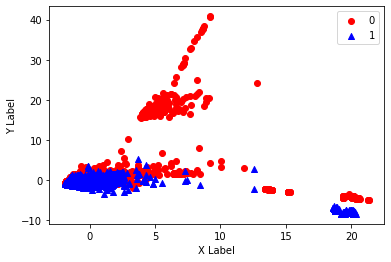

In [49]:
# 使用PCA降维将词频矩阵转化为二维数据，画图
from sklearn.decomposition import PCA        # PCA 降维

kind = np.unique(df_post['类标签'].values)
print(kind)
pca = PCA(n_components=2)
newvector = pca.fit_transform(countvector)
plt.figure()
for i,c,m in zip(range(len(kind)),['r','b','g','y'],['o','^','>','<']):
    index = df_post[df_post['类标签']==kind[i]].index
    x = newvector[index,0]
    y = newvector[index,1]
    plt.scatter(x,y,c=c,marker=m,label=kind[i])
plt.legend()
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()
plt.savefig('PCAA.png',dpi=600)

注意：上面的代码运行需要比较长的时间，对更大的数据考虑使用华为云平台运行

### 步骤 3	数据集划分
数据集划分的方法有：

    1.留出法；
    2.交叉验证法；
    3.自助法。
对于本次实验的数据集和任务，应该用什么方法处理呢？
    本次实验以留出法为例：
    打印数据集标签统计数据，代码：

In [17]:
y = df_post['类标签']
print(y)
#X为去掉标签列的数据
X = countvector
print(X)
print("X.shape", X.shape)
print("y.shape", y.shape)

0        0
1        0
2        0
3        0
4        0
        ..
10258    1
10259    1
10260    1
10261    1
10262    1
Name: 类标签, Length: 10263, dtype: int64
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X.shape (10263, 49871)
y.shape (10263,)


测试，参考个人的gitHub链接：[https://github.com/JunTheRipper/Data-Mining-Access/blob/main/3.Data-Classification-Forecast/3.Data-Classification-Forecast%E6%95%B0%E6%8D%AE%E5%88%86%E7%B1%BB%E9%A2%84%E6%B5%8B.ipynb](https://github.com/JunTheRipper/Data-Mining-Access/blob/main/3.Data-Classification-Forecast/3.Data-Classification-Forecast%E6%95%B0%E6%8D%AE%E5%88%86%E7%B1%BB%E9%A2%84%E6%B5%8B.ipynb)

利用train_test_split方法，将X,y随机划分为训练集（train_data），训练集标签（train_labels），测试集（test_data），试集标签（test_labels），按训练集：测试集=8:2的概率划分。


In [18]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2,random_state=1)
print("train_data.shape", train_data.shape)
print("test_data.shape", test_data.shape)
print("train_labels.shape", train_labels.shape)
print("test_labels.shape", test_labels.shape)

train_data.shape (8210, 49871)
test_data.shape (2053, 49871)
train_labels.shape (8210,)
test_labels.shape (2053,)


### 步骤 7	KNN分类

参考链接：[https://github.com/JunTheRipper/Data-Mining-Access/blob/main/Summary-Of-Machine-Learning/B.sipervised-learning/B1.classification.ipynb](https://github.com/JunTheRipper/Data-Mining-Access/blob/main/Summary-Of-Machine-Learning/B.sipervised-learning/B1.classification.ipynb)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kNN_classifier = KNeighborsClassifier(n_neighbors=5)#初始化k近邻算法对象
kNN_classifier.fit(train_data,train_labels)#对训练集进行训练
label_predict = kNN_classifier.predict(test_data)#对测试集进行预测
"""预测结果"""
print("Predict_rlt:",label_predict)
"""预测准确个数"""
print("Correct_no:",sum(label_predict==test_labels))
"""预测准确率"""
print("Accuracy:",sum(label_predict==test_labels)/len(test_labels))


### 模型评估

这里用交叉验证法进行模型评估：

In [3]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
score_knn_accuracy = np.mean(cross_val_score(estimator=knn, X=X, y=y, cv=5, scoring='accuracy'))
print("Score_accuracy:",score_knn_accuracy)

NameError: name 'KNeighborsClassifier' is not defined

可以看到上面的输出

## TEST FOR LAB B